# Parcial Segundo Corte: Predicción del Consumo Eléctrico en Hogares

Este notebook implementa un análisis predictivo del consumo eléctrico en hogares utilizando modelos de regresión lineal múltiple y polinómica.

In [3]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## 1. Carga y análisis inicial de datos

In [4]:
# Cargamos el dataset
df = pd.read_csv('consumo_hogar.csv')

# Mostramos las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Información sobre el dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
   Temperatura  Personas  Electrodomesticos  Consumo_kWh
0    17.759953       3.0               11.0    37.636890
1    28.529532       5.0               17.0    69.615739
2    26.621040       3.0               15.0    54.814876
3    25.202059       3.0                7.0    41.809595
4    16.726315       3.0               18.0    62.102053

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62209 entries, 0 to 62208
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperatura        59099 non-null  float64
 1   Personas           59099 non-null  float64
 2   Electrodomesticos  59099 non-null  float64
 3   Consumo_kWh        59099 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB
None

Estadísticas descriptivas:
        Temperatura     Personas  Electrodomesticos   Consumo_kWh
count  59099.000000  59099.00000       59099.000000  59099.000000
mea

## 2. Limpieza de datos

Valores nulos por columna:
Temperatura          0
Personas             0
Electrodomesticos    0
Consumo_kWh          0
dtype: int64

Número de outliers detectados: 783


C:\Users\Oscar\AppData\Local\Temp\ipykernel_17316\3186058238.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(df[columna].mean(), inplace=True)


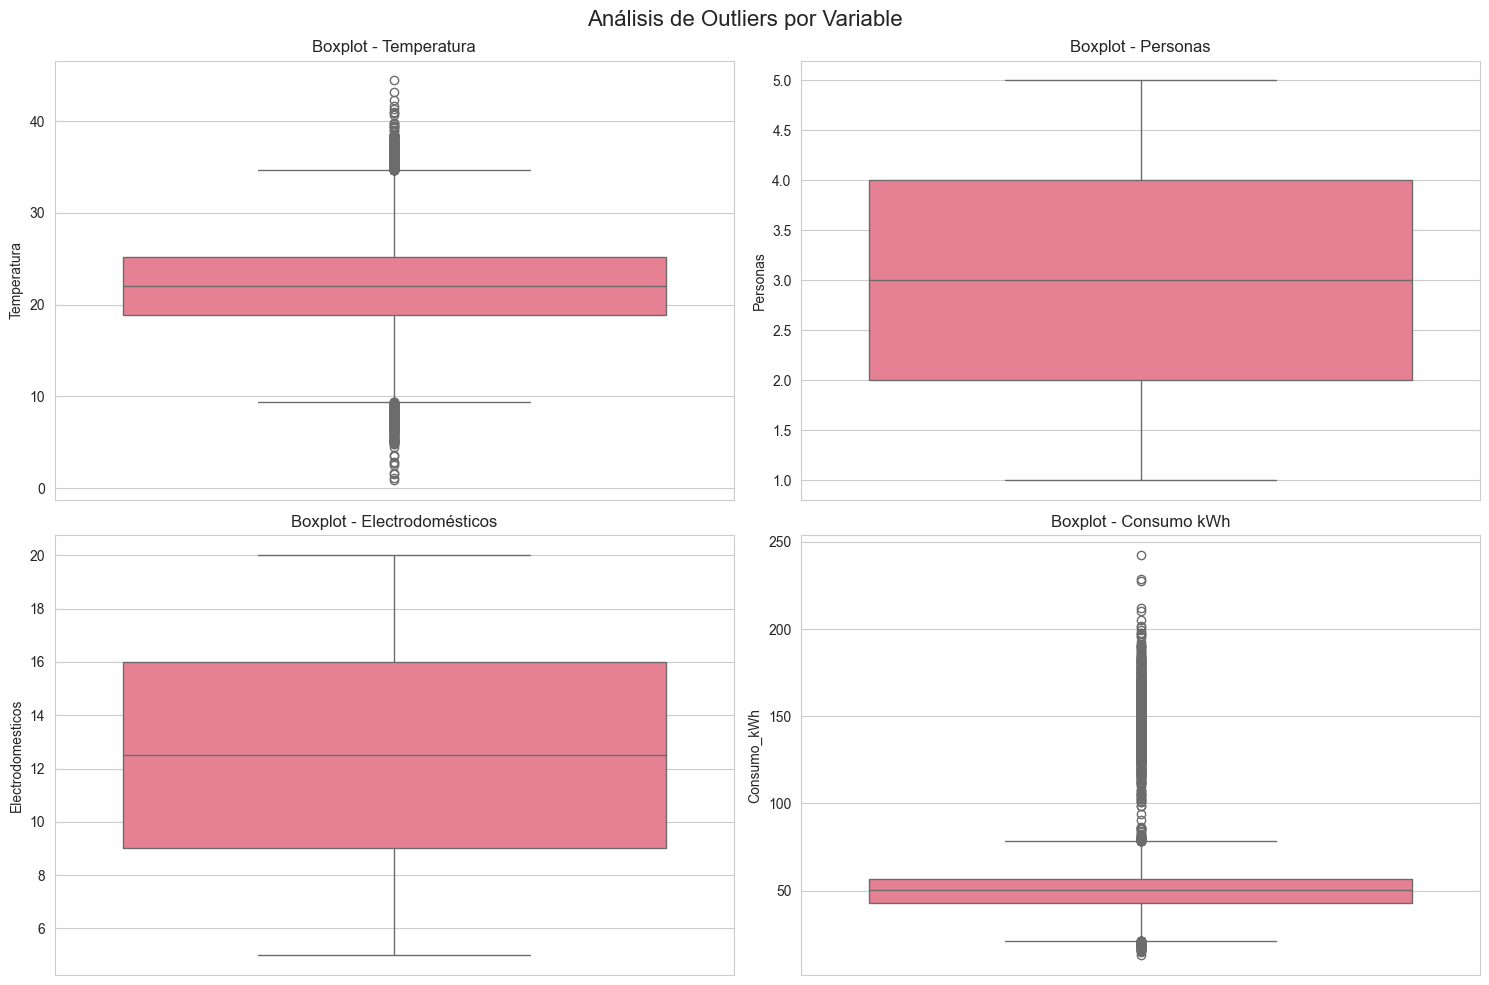

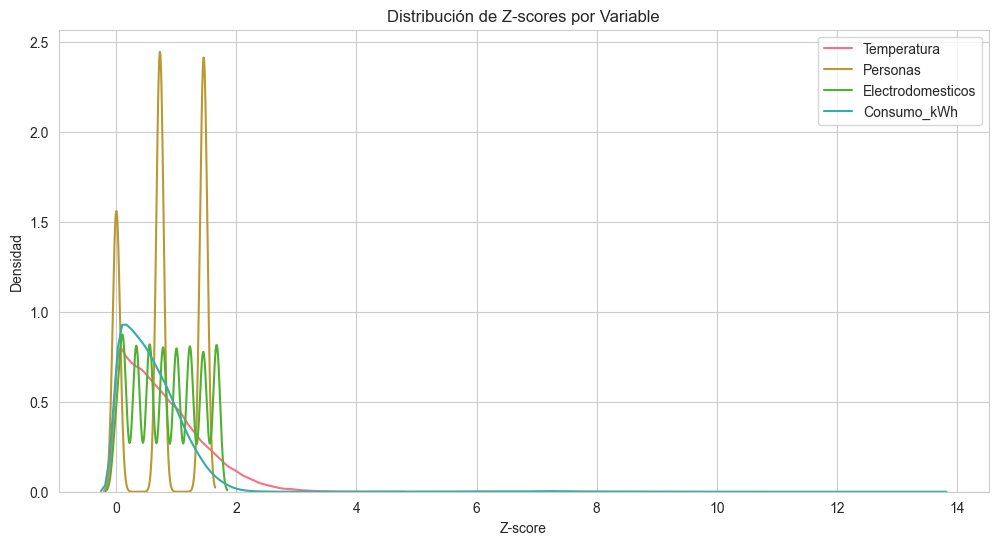


Registros después de eliminar outliers: 61426


In [7]:
# Verificamos valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Imputamos valores nulos con la media
for columna in df.columns:
    df[columna].fillna(df[columna].mean(), inplace=True)

# Detectamos outliers usando z-score
z_scores = np.abs((df - df.mean()) / df.std())
outliers = (z_scores > 3).any(axis=1)
print("\nNúmero de outliers detectados:", outliers.sum())

# Creamos subplots para visualizar outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Outliers por Variable', fontsize=16)

# Boxplots para cada variable
sns.boxplot(data=df, y='Temperatura', ax=axes[0,0])
axes[0,0].set_title('Boxplot - Temperatura')

sns.boxplot(data=df, y='Personas', ax=axes[0,1])
axes[0,1].set_title('Boxplot - Personas')

sns.boxplot(data=df, y='Electrodomesticos', ax=axes[1,0])
axes[1,0].set_title('Boxplot - Electrodomésticos')

sns.boxplot(data=df, y='Consumo_kWh', ax=axes[1,1])
axes[1,1].set_title('Boxplot - Consumo kWh')

plt.tight_layout()
plt.show()

# Z-score distribution visualization
plt.figure(figsize=(12, 6))
for column in df.columns:
    sns.kdeplot(z_scores[column], label=column)
plt.title('Distribución de Z-scores por Variable')
plt.xlabel('Z-score')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Eliminamos outliers
df_clean = df[~outliers]
print("\nRegistros después de eliminar outliers:", len(df_clean))

## 3. Visualización exploratoria

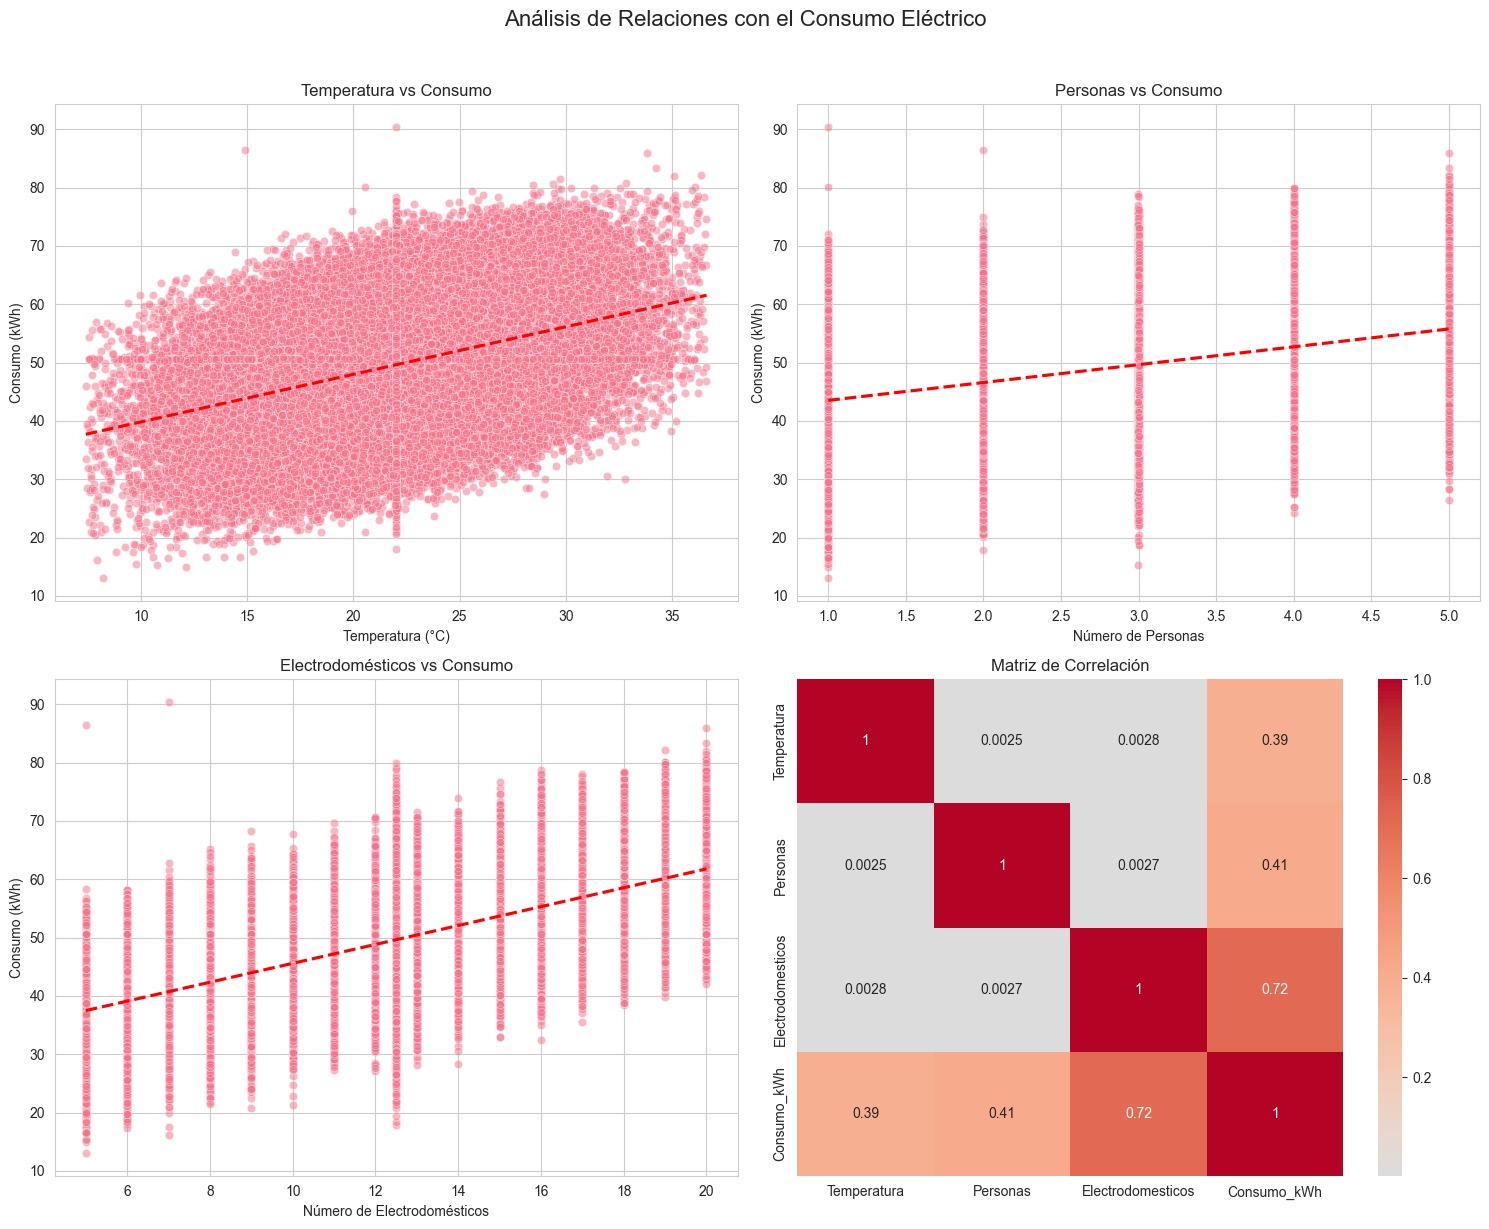

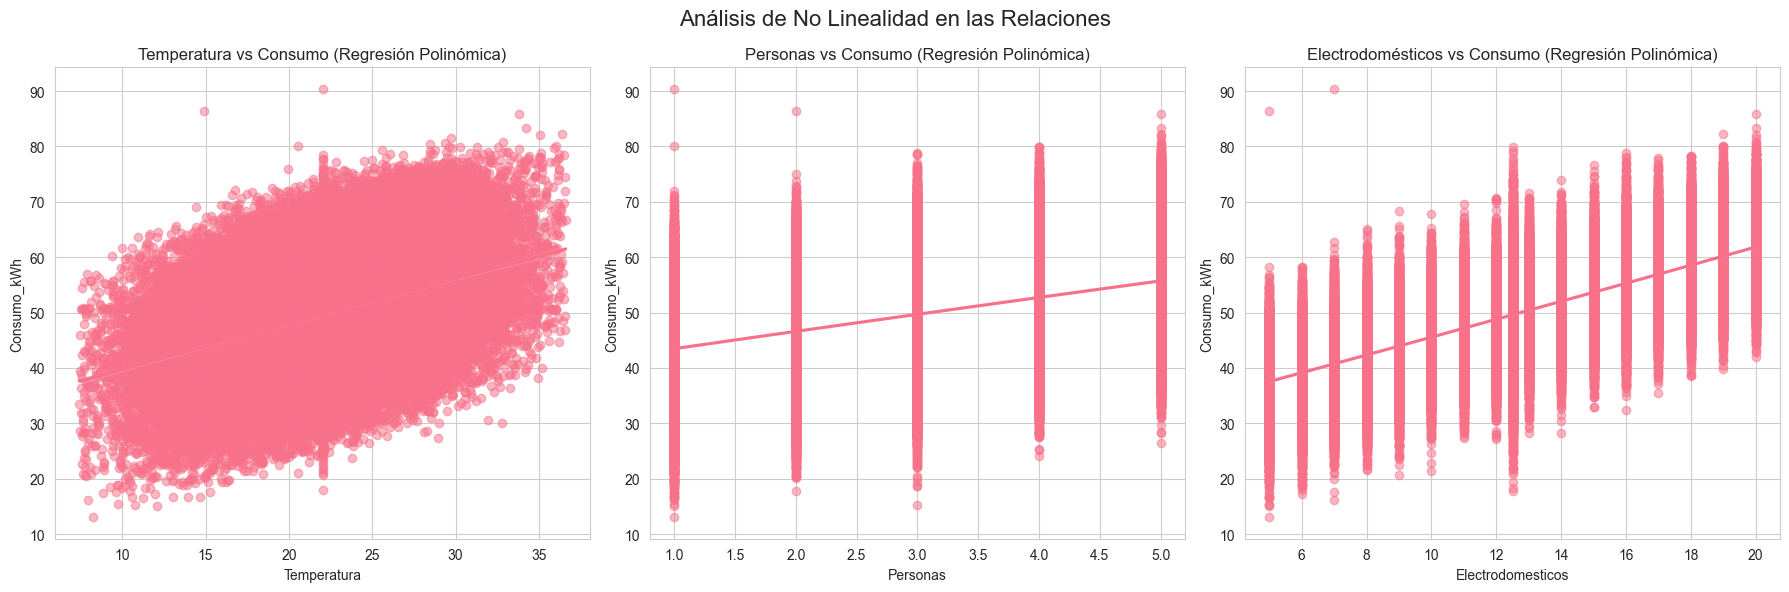

In [6]:
# Configuración de estilo
sns.set_style("whitegrid")
sns.set_palette("husl")

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Relaciones con el Consumo Eléctrico', fontsize=16, y=1.02)

# 1. Temperatura vs Consumo con línea de tendencia
sns.scatterplot(data=df_clean, x='Temperatura', y='Consumo_kWh', alpha=0.5, ax=axes[0,0])
sns.regplot(data=df_clean, x='Temperatura', y='Consumo_kWh', scatter=False, 
            color='red', line_kws={'linestyle': '--'}, ax=axes[0,0])
axes[0,0].set_title('Temperatura vs Consumo')
axes[0,0].set_xlabel('Temperatura (°C)')
axes[0,0].set_ylabel('Consumo (kWh)')

# 2. Personas vs Consumo con línea de tendencia
sns.scatterplot(data=df_clean, x='Personas', y='Consumo_kWh', alpha=0.5, ax=axes[0,1])
sns.regplot(data=df_clean, x='Personas', y='Consumo_kWh', scatter=False,
            color='red', line_kws={'linestyle': '--'}, ax=axes[0,1])
axes[0,1].set_title('Personas vs Consumo')
axes[0,1].set_xlabel('Número de Personas')
axes[0,1].set_ylabel('Consumo (kWh)')

# 3. Electrodomésticos vs Consumo con línea de tendencia
sns.scatterplot(data=df_clean, x='Electrodomesticos', y='Consumo_kWh', alpha=0.5, ax=axes[1,0])
sns.regplot(data=df_clean, x='Electrodomesticos', y='Consumo_kWh', scatter=False,
            color='red', line_kws={'linestyle': '--'}, ax=axes[1,0])
axes[1,0].set_title('Electrodomésticos vs Consumo')
axes[1,0].set_xlabel('Número de Electrodomésticos')
axes[1,0].set_ylabel('Consumo (kWh)')

# 4. Matriz de correlación
correlation_matrix = df_clean[['Temperatura', 'Personas', 'Electrodomesticos', 'Consumo_kWh']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Matriz de Correlación')

plt.tight_layout()
plt.show()

# Análisis adicional de no linealidad
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Análisis de No Linealidad en las Relaciones', fontsize=16)

# Temperatura
sns.regplot(data=df_clean, x='Temperatura', y='Consumo_kWh', 
            scatter_kws={'alpha':0.5}, order=2, ax=axes[0])
axes[0].set_title('Temperatura vs Consumo (Regresión Polinómica)')

# Personas
sns.regplot(data=df_clean, x='Personas', y='Consumo_kWh', 
            scatter_kws={'alpha':0.5}, order=2, ax=axes[1])
axes[1].set_title('Personas vs Consumo (Regresión Polinómica)')

# Electrodomésticos
sns.regplot(data=df_clean, x='Electrodomesticos', y='Consumo_kWh', 
            scatter_kws={'alpha':0.5}, order=2, ax=axes[2])
axes[2].set_title('Electrodomésticos vs Consumo (Regresión Polinómica)')

plt.tight_layout()
plt.show()

## 4. Modelado

### a) Regresión lineal múltiple

Coeficientes del modelo lineal:
Temperatura: 0.8098
Personas: 3.0408
Electrodomesticos: 1.6141
Intercepto: 2.5165

Métricas del modelo lineal:
MSE: 17.5098
R²: 0.8302


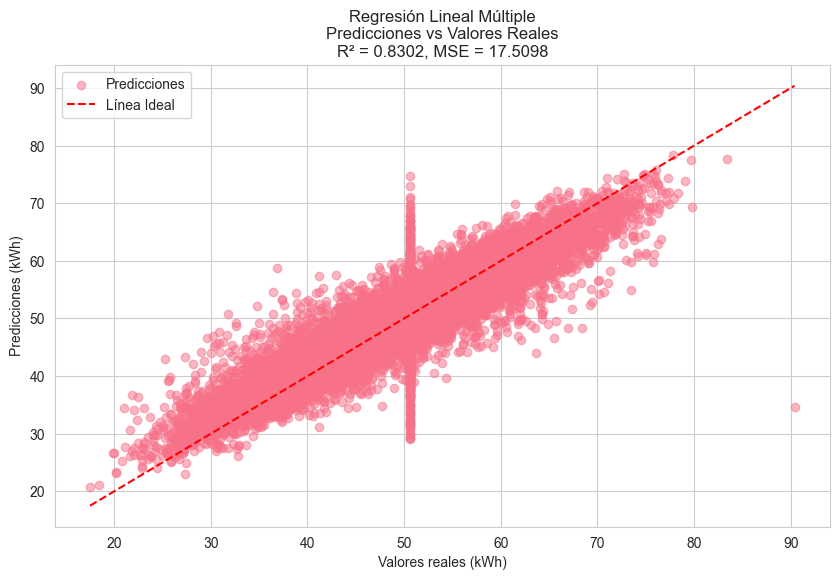

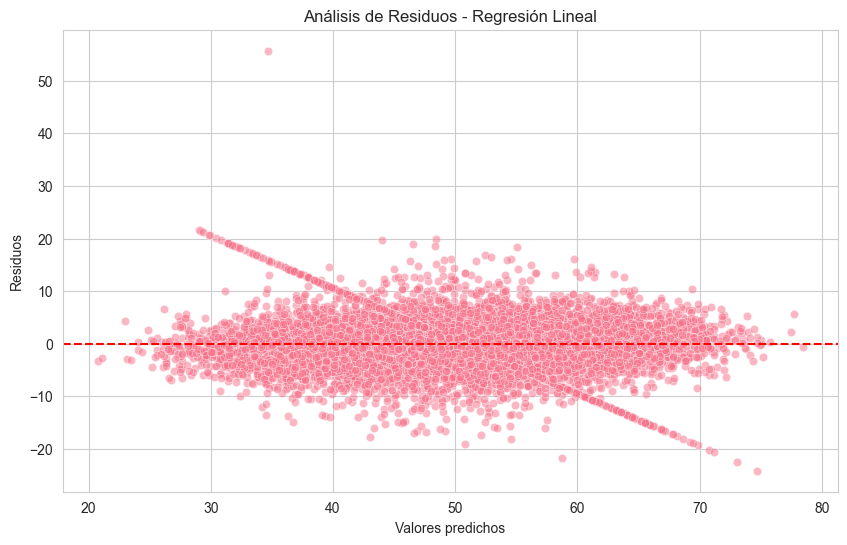

In [8]:
# Preparamos los datos para el modelo
X = df_clean[['Temperatura', 'Personas', 'Electrodomesticos']]
y = df_clean['Consumo_kWh']

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Mostramos los coeficientes y el intercepto
print("Coeficientes del modelo lineal:")
for feature, coef in zip(X.columns, modelo_lineal.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {modelo_lineal.intercept_:.4f}")

# Realizamos predicciones
y_pred_lineal = modelo_lineal.predict(X_test)

# Evaluación del modelo lineal
mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)
print("\nMétricas del modelo lineal:")
print(f"MSE: {mse_lineal:.4f}")
print(f"R²: {r2_lineal:.4f}")

# Visualización del modelo lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lineal, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Predicciones (kWh)')
plt.title('Regresión Lineal Múltiple\nPredicciones vs Valores Reales\nR² = {:.4f}, MSE = {:.4f}'.format(r2_lineal, mse_lineal))
plt.legend()
plt.grid(True)
plt.show()

# Análisis de residuos del modelo lineal
plt.figure(figsize=(10, 6))
residuos_lineal = y_test - y_pred_lineal
sns.scatterplot(x=y_pred_lineal, y=residuos_lineal, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos - Regresión Lineal')
plt.grid(True)
plt.show()

### b) Regresión polinómica de grado 2 y 3

Regresión Polinómica Grado 2:
------------------------------
MSE: 17.5137
R²: 0.8302


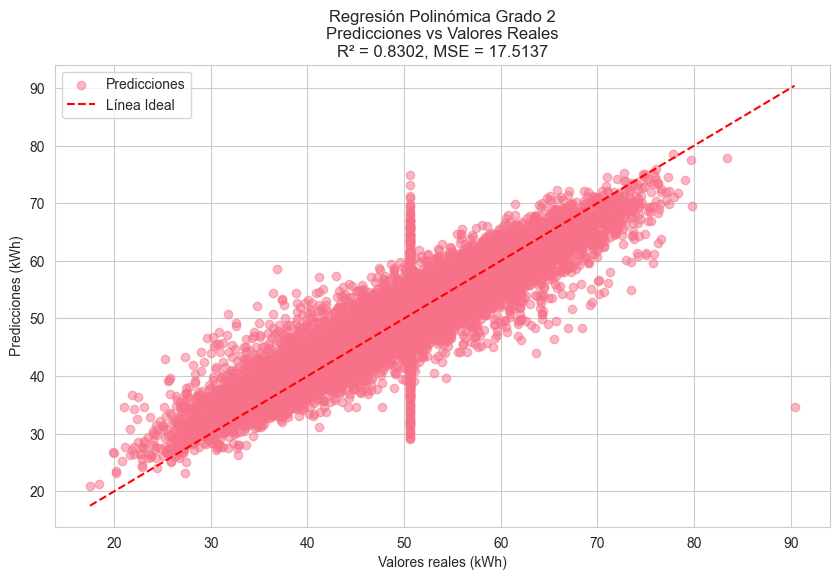


Regresión Polinómica Grado 3:
------------------------------
MSE: 17.5235
R²: 0.8301


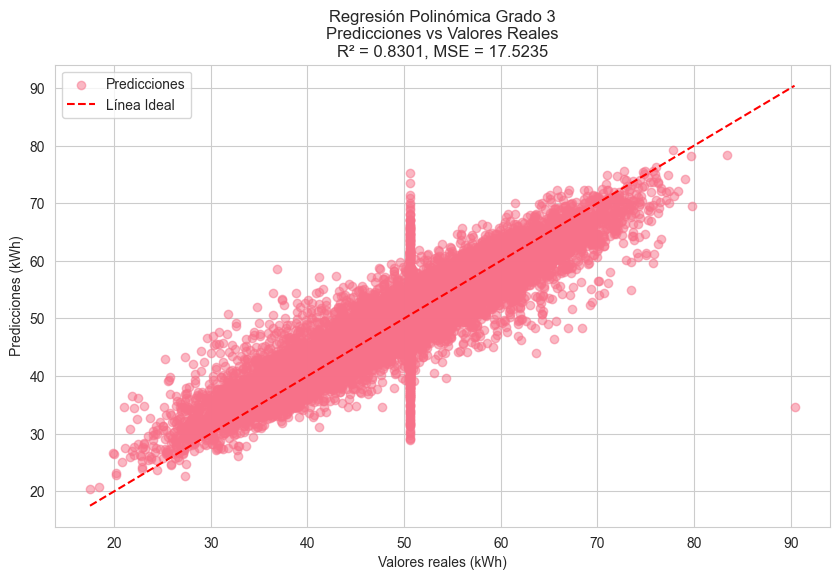

In [11]:
# Regresión Polinómica Grado 2
print("Regresión Polinómica Grado 2:")
print("-" * 30)
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2_train = poly_features_2.fit_transform(X_train)
X_poly_2_test = poly_features_2.transform(X_test)

modelo_poly_2 = LinearRegression()
modelo_poly_2.fit(X_poly_2_train, y_train)
y_pred_poly_2 = modelo_poly_2.predict(X_poly_2_test)

mse_poly_2 = mean_squared_error(y_test, y_pred_poly_2)
r2_poly_2 = r2_score(y_test, y_pred_poly_2)
residuos_poly_2 = y_test - y_pred_poly_2  # Calculamos los residuos
print(f"MSE: {mse_poly_2:.4f}")
print(f"R²: {r2_poly_2:.4f}")

# Visualización modelo polinómico grado 2
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly_2, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Predicciones (kWh)')
plt.title('Regresión Polinómica Grado 2\nPredicciones vs Valores Reales\nR² = {:.4f}, MSE = {:.4f}'.format(r2_poly_2, mse_poly_2))
plt.legend()
plt.grid(True)
plt.show()

# Regresión Polinómica Grado 3
print("\nRegresión Polinómica Grado 3:")
print("-" * 30)
poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3_train = poly_features_3.fit_transform(X_train)
X_poly_3_test = poly_features_3.transform(X_test)

modelo_poly_3 = LinearRegression()
modelo_poly_3.fit(X_poly_3_train, y_train)
y_pred_poly_3 = modelo_poly_3.predict(X_poly_3_test)

mse_poly_3 = mean_squared_error(y_test, y_pred_poly_3)
r2_poly_3 = r2_score(y_test, y_pred_poly_3)
residuos_poly_3 = y_test - y_pred_poly_3  # Calculamos los residuos
print(f"MSE: {mse_poly_3:.4f}")
print(f"R²: {r2_poly_3:.4f}")

# Visualización modelo polinómico grado 3
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly_3, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Predicciones (kWh)')
plt.title('Regresión Polinómica Grado 3\nPredicciones vs Valores Reales\nR² = {:.4f}, MSE = {:.4f}'.format(r2_poly_3, mse_poly_3))
plt.legend()
plt.grid(True)
plt.show()

## 5. Evaluación y comparación

Comparación de los modelos:
--------------------------------------------------
                        Modelo       MSE       R2     RMSE
              Regresión lineal 17.509807 0.830228 4.184472
Regresión polinómica (grado 2) 17.513712 0.830190 4.184939
Regresión polinómica (grado 3) 17.523466 0.830095 4.186104


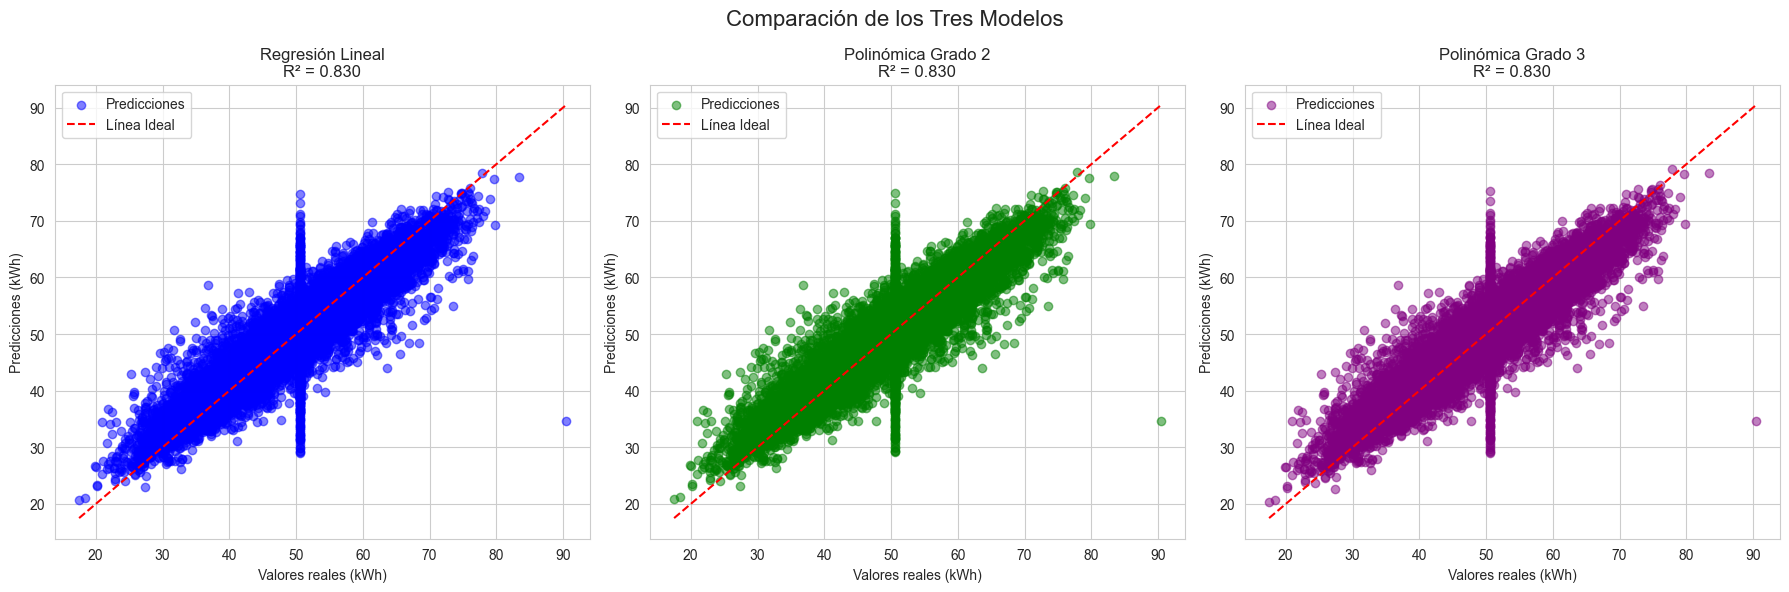

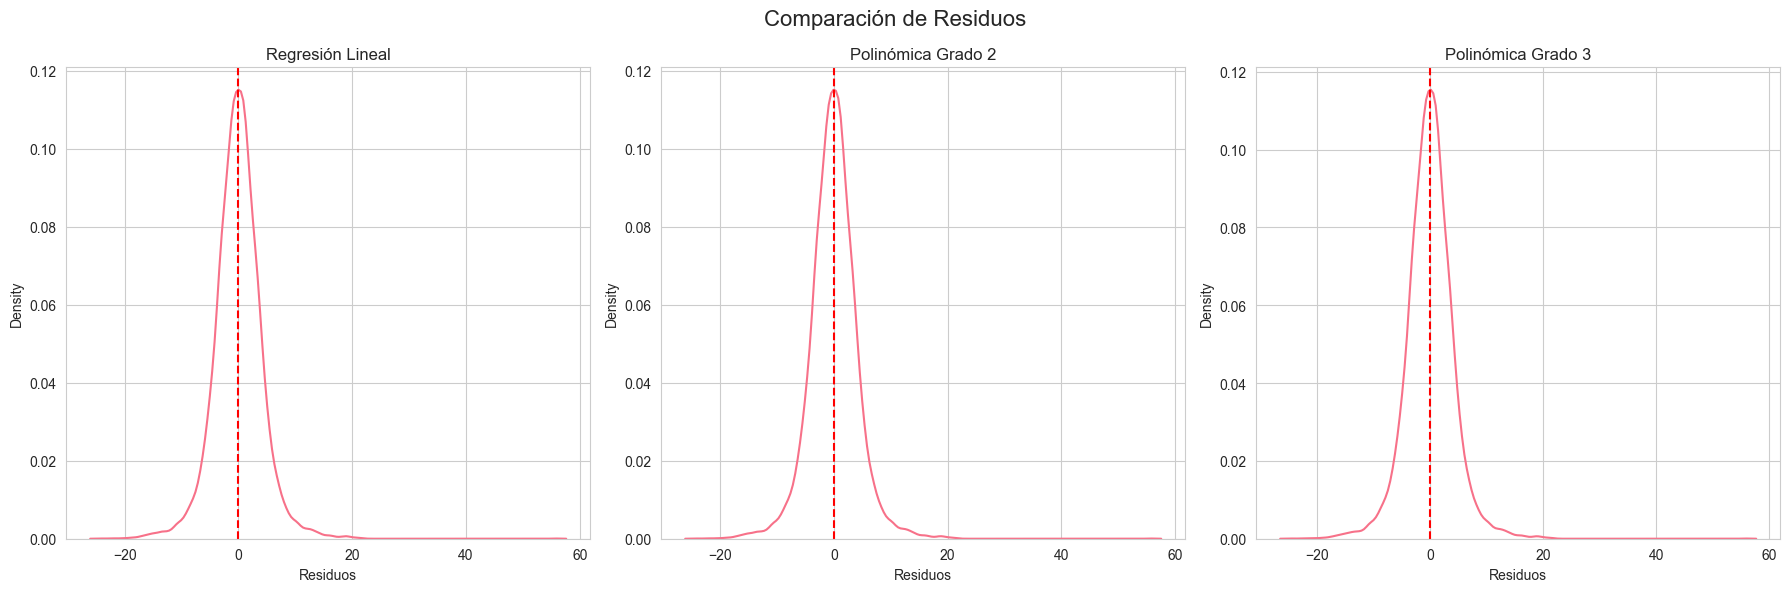

In [12]:
# Tabla comparativa de resultados
resultados = pd.DataFrame({
    'Modelo': ['Regresión lineal', 'Regresión polinómica (grado 2)', 'Regresión polinómica (grado 3)'],
    'MSE': [mse_lineal, mse_poly_2, mse_poly_3],
    'R2': [r2_lineal, r2_poly_2, r2_poly_3],
    'RMSE': [np.sqrt(mse_lineal), np.sqrt(mse_poly_2), np.sqrt(mse_poly_3)]
})

print("Comparación de los modelos:")
print("-" * 50)
print(resultados.to_string(index=False))

# Comparación visual de los tres modelos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparación de los Tres Modelos', fontsize=16)

# Regresión lineal
axes[0].scatter(y_test, y_pred_lineal, alpha=0.5, c='blue', label='Predicciones')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
axes[0].set_xlabel('Valores reales (kWh)')
axes[0].set_ylabel('Predicciones (kWh)')
axes[0].set_title('Regresión Lineal\nR² = {:.3f}'.format(r2_lineal))
axes[0].legend()

# Regresión polinómica grado 2
axes[1].scatter(y_test, y_pred_poly_2, alpha=0.5, c='green', label='Predicciones')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
axes[1].set_xlabel('Valores reales (kWh)')
axes[1].set_ylabel('Predicciones (kWh)')
axes[1].set_title('Polinómica Grado 2\nR² = {:.3f}'.format(r2_poly_2))
axes[1].legend()

# Regresión polinómica grado 3
axes[2].scatter(y_test, y_pred_poly_3, alpha=0.5, c='purple', label='Predicciones')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
axes[2].set_xlabel('Valores reales (kWh)')
axes[2].set_ylabel('Predicciones (kWh)')
axes[2].set_title('Polinómica Grado 3\nR² = {:.3f}'.format(r2_poly_3))
axes[2].legend()

plt.tight_layout()
plt.show()

# Comparación de distribución de residuos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparación de Residuos', fontsize=16)

# Residuos de regresión lineal
sns.kdeplot(data=residuos_lineal, ax=axes[0])
axes[0].axvline(x=0, color='r', linestyle='--')
axes[0].set_xlabel('Residuos')
axes[0].set_title('Regresión Lineal')

# Residuos de regresión polinómica grado 2
sns.kdeplot(data=residuos_poly_2, ax=axes[1])
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Residuos')
axes[1].set_title('Polinómica Grado 2')

# Residuos de regresión polinómica grado 3
sns.kdeplot(data=residuos_poly_3, ax=axes[2])
axes[2].axvline(x=0, color='r', linestyle='--')
axes[2].set_xlabel('Residuos')
axes[2].set_title('Polinómica Grado 3')

plt.tight_layout()
plt.show()

## 6. Conclusiones

Basándonos en los resultados obtenidos, podemos concluir:

1. **Ajuste de los modelos**: Comparando los valores de R² y MSE, podemos determinar qué modelo se ajusta mejor a los datos.

2. **Impacto de las variables**: A través de los coeficientes del modelo lineal y las características polinómicas, podemos identificar qué variables tienen mayor influencia en el consumo eléctrico.

3. **Sobreajuste**: Analizando las diferencias entre los modelos polinómicos y el lineal, podemos determinar si hay sobreajuste.

4. **Recomendaciones para una empresa energética**:
   - Basadas en las variables más influyentes
   - Consideraciones sobre la precisión de las predicciones
   - Sugerencias para la implementación práctica del modelo